In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
df = pd.read_csv("Salary_dataset.csv")


In [4]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [6]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [7]:
plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0, 0.5, 'Salary ($)')

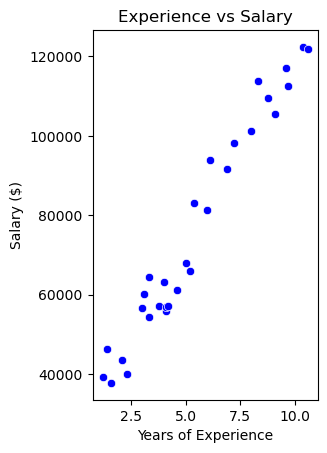

In [8]:
plt.subplot(1, 2, 1)
sns.scatterplot(x='YearsExperience', y='Salary', data=df, color='blue')
plt.title('Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary ($)')


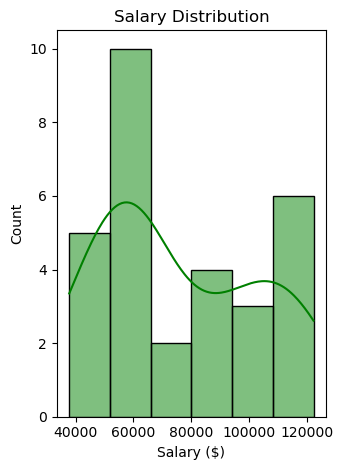

In [9]:
plt.subplot(1, 2, 2)
sns.histplot(df['Salary'], kde=True, color='green')
plt.title('Salary Distribution')
plt.xlabel('Salary ($)')
plt.tight_layout()
plt.show()


In [10]:
X = df[['YearsExperience']]  
y = df['Salary']             


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print("Model Coefficients:")
print(f"Intercept (β₀): {model.intercept_:.2f}")
print(f"Slope (β₁): {model.coef_[0]:.2f}")




Model Coefficients:
Intercept (β₀): 24380.20
Slope (β₁): 9423.82


In [14]:
print("\nModel Performance Metrics:")
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.4f}")




Model Performance Metrics:
Mean Squared Error (MSE): 49830096.86
Root Mean Squared Error (RMSE): 7059.04
R-squared (R²): 0.9024


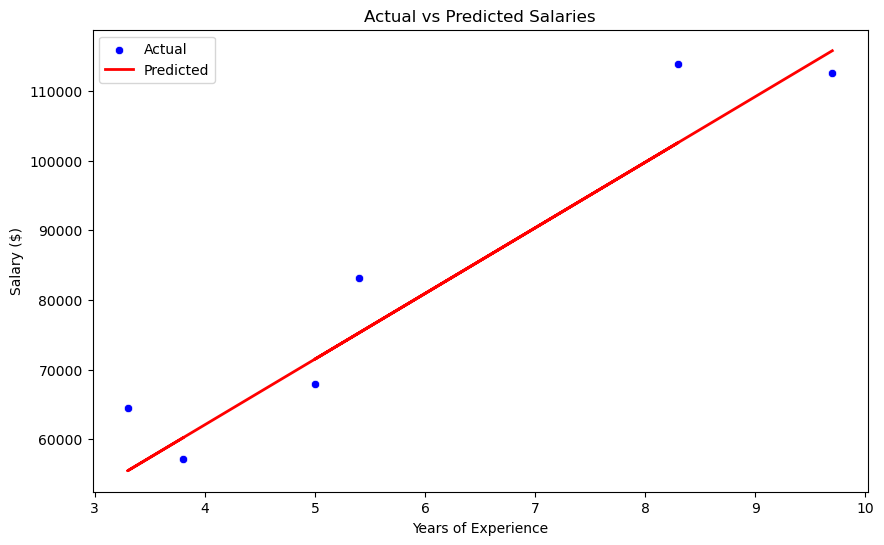

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['YearsExperience'], y=y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Actual vs Predicted Salaries')
plt.xlabel('Years of Experience')
plt.ylabel('Salary ($)')
plt.legend()
plt.show()



Text(0, 0.5, 'Residuals')

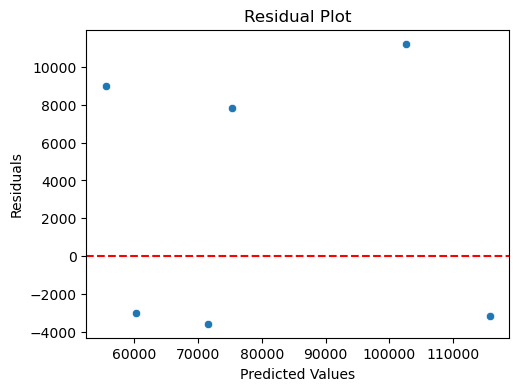

In [16]:
residuals = y_test - y_pred

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')


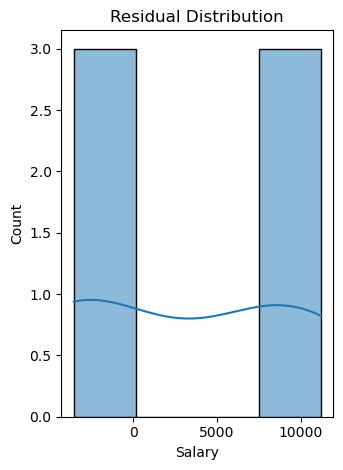

In [17]:
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.title('Residual Distribution')

plt.tight_layout()
plt.show()

